## Setup Inicial

In [9]:
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
from os import listdir, remove, path
from imghdr import what
from sklearn.model_selection import train_test_split

In [10]:
tf.__version__

'2.11.0'

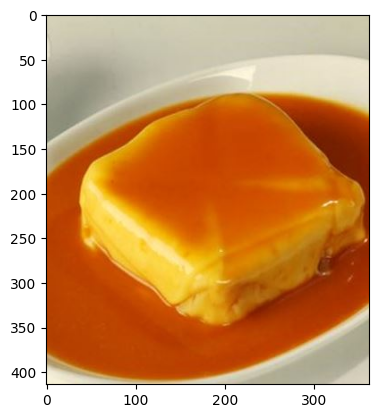

In [11]:
img = cv.imread('assets/francesinha/4.jpg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

## Tratamento dos Dados

#### Remover possíveis imagens irreconhecíveis pelo Python

In [8]:
extensoes = ['jpeg', 'png', 'jpg', 'JPG', 'JPEG', 'PNG']

In [12]:
listdir('assets')

['aletria',
 'arroz_cabidela',
 'bacalhau_bras',
 'bacalhau_natas',
 'batatas_fritas',
 'bolo_chocolate',
 'cachorro',
 'caldo_verde',
 'cozido_portuguesa',
 'croissant',
 'donuts',
 'esparguete_bolonhesa',
 'feijoada',
 'francesinha',
 'gelado',
 'hamburguer',
 'jardineira',
 'nata',
 'ovo',
 'pasteis_bacalhau',
 'pizza',
 'tripas_moda_porto',
 'waffles']

In [13]:
for class_imagem in listdir('assets'): 
    for imagem in listdir(path.join('assets', class_imagem)): # Para todas as pastas de imagens
        path_imagem = path.join('assets', class_imagem, imagem) # Cada imagem em cada pasta
        try:
            img = cv.imread(path_imagem) # Abrir a imagem
            tip = what(path_imagem)
            if tip not in extensoes:
                print('Imagem não compatível com a leitura Python, a remover a imagem {}'.format(path_imagem))
                remove(path_imagem)
        except Exception as e:
            print('Erro com a imagem {}'.format(path_imagem))

Imagem não compatível com a leitura Python, a remover a imagem assets\aletria\201.jpg
Imagem não compatível com a leitura Python, a remover a imagem assets\aletria\71.jpg
Imagem não compatível com a leitura Python, a remover a imagem assets\aletria\90.jpg
Imagem não compatível com a leitura Python, a remover a imagem assets\aletria\97.jpg
Imagem não compatível com a leitura Python, a remover a imagem assets\bacalhau_bras\282.jpg
Imagem não compatível com a leitura Python, a remover a imagem assets\bacalhau_bras\484.jpg
Imagem não compatível com a leitura Python, a remover a imagem assets\bacalhau_natas\15.jpg
Imagem não compatível com a leitura Python, a remover a imagem assets\bacalhau_natas\77.jpg
Imagem não compatível com a leitura Python, a remover a imagem assets\bacalhau_natas\84.jpg
Imagem não compatível com a leitura Python, a remover a imagem assets\batatas_fritas\104.jpg
Imagem não compatível com a leitura Python, a remover a imagem assets\batatas_fritas\118.jpg
Imagem não co

#### Transformar todas as imagens para terem o mesmo tamanho

In [17]:
for pasta in listdir('assets'): 
    subpasta = path.join('assets', pasta)
    
    for imagem in listdir(subpasta):
        if imagem.endswith('.jpeg') or imagem.endswith('.png') or imagem.endswith('.jpg') or imagem.endswith('.JPG') or imagem.endswith('.JPEG') or imagem.endswith('.PNG'):
            # Ler a imagem
            img = cv.imread(path.join(subpasta, imagem))

            # Colocar imagens todas no mesmo tamanho
            img = cv.resize(img, (224,224))

            # Colocar as imagens no formato RGB
            img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

            # Gravar a nova imagem
            cv.imwrite(path.join(subpasta, imagem), img)

#### Divisão dos Dados

In [18]:
# Listas vazias para guardar os paths das imagens e as suas labels
path_imagens = []
labels = []

In [19]:
# Obter os paths e as labels das imagens
for label in listdir('assets'):
    pasta_label = path.join('assets', label)
    if path.isdir(pasta_label): # isdir vai procurar por pastas para retirar os paths das imagens dentro dessa pasta
        for imagem in listdir(pasta_label):
            caminho_imagem = path.join(pasta_label, imagem)
            path_imagens.append(caminho_imagem)
            labels.append(label)

# Dividir os dados em dados de treino e dados de validação
img_treino, img_validacao, labels_treino, labels_validacao = train_test_split(path_imagens, labels, test_size=0.25, random_state=2023)

# Print do numero de amostras nos daods de treino e validação
print('Amostras de treino:',len(img_treino))
print('Amostras de validação:',len(img_validacao))

Amostras de treino: 3879
Amostras de validação: 1294
